In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
img_size = (48, 48)
train_dir = 'data/train'
val_dir = 'data/test'
batch_size = 64
num_epochs = 10


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 11668 images belonging to 7 classes.
Found 6937 images belonging to 7 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  


D:\faceemotion\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
)


D:\faceemotion\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


D:\faceemotion\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.1758 - loss: 1.8987 - val_accuracy: 0.2559 - val_loss: 1.8156
Epoch 2/10
  1/182 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.2500 - loss: 1.8186

D:\faceemotion\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.2500 - loss: 1.8186 - val_accuracy: 0.2632 - val_loss: 1.8136
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.2589 - loss: 1.8195 - val_accuracy: 0.3762 - val_loss: 1.6965
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.2500 - loss: 1.8192 - val_accuracy: 0.3770 - val_loss: 1.6960
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 33s 179ms/step - accuracy: 0.3164 - loss: 1.7482 - val_accuracy: 0.3760 - val_loss: 1.6411
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.3594 - loss: 1.6624 - val_accuracy: 0.3740 - val_loss: 1.6406
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.3381 - loss: 1.7047 - val_accuracy: 0.3822 - val_loss: 1.6277
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.4062 - loss: 1.6049 - val_accuracy: 0.3857 - val_loss: 1.6256
Epoch 9/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.3599 - loss: 1.6570 - val_accura

In [7]:
model.save("emotion_model.h5")
print(" model saved as emotion_model.h5")


✅ Model saved as emotion_model.h5


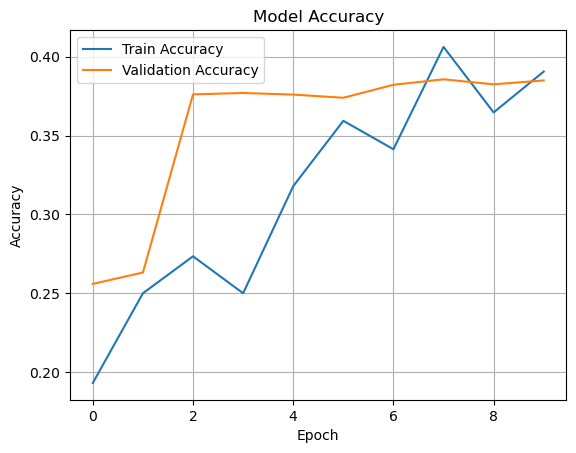

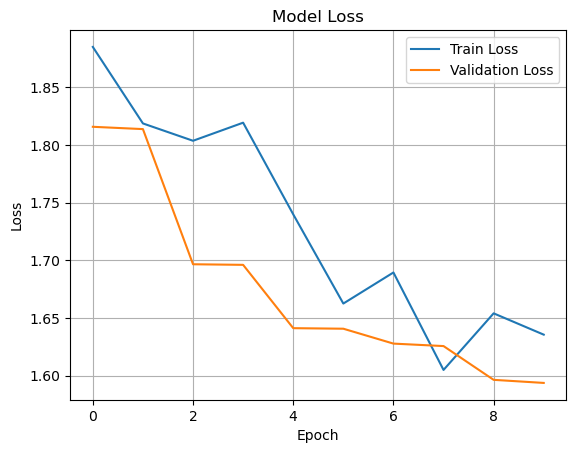

In [8]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
